In [1]:
from functionsRosei import *
from constants import *
from functions import * 
import matplotlib.pyplot as plt

0.0177717228363


In [2]:
print('Drude Parameters')
print('----------------')
print('gammaBulk = {:.4g}' .format(gammaBu))
print('Eplasma = {:.4g}' .format(Eplasma))
print('Eg = {:.4g}' .format(Cnuf))

print('--------------------')
print('Interband Parameters')
print('--------------------')
print('gammab = {:.4g}' .format(gammaIB))
print('Eg = {:.4g}' .format(Eg))
print('C*nuf: {:.4g}' .format(Cnuf))

wavelengths = np.linspace(200, 800, 500)        #nm
energies = hE*c*1e-6/wavelengths                #eV
Tamb = 300                                      #K
r = 100                                         #nm Santillan used this as bulk

dataFolder = 'data'

Drude Parameters
----------------
gammaBulk = 0.01777
Eplasma = 9.083
Eg = 0.7425
--------------------
Interband Parameters
--------------------
gammab = 0.09873
Eg = 1.91
C*nuf: 0.7425


In [3]:
dataAg = np.loadtxt(dataFolder+'/Ag_Johnson&Christy.csv', delimiter = ',', skiprows=1)
wavelengthsDataAg = np.array(dataAg[:,0])*1e3
nDataAg = np.array(dataAg[:,1])
kDataAg = np.array(dataAg[:,2])

energiesDataAg = hE*c*1e-6/wavelengthsDataAg

dielRealDataAg = nDataAg**2 - kDataAg**2
dielImagDataAg = 2*nDataAg*kDataAg

# $\varepsilon^{D}$

In [4]:
dielDrude = funcDrudeSize(energies, Eplasma, gammaBu, r, False)

# $\varepsilon^{IB}$

In [5]:
dielIBSantillan = np.array([funcDielIBsizeFit(E, r, Eg, gammaIB, Ef, Tamb) for E in energies])

c:\Users\Usuario\Desktop\temp\ThesisDataTreatment\functions.py:48: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp((E-Ef)/(k*T)))


In [6]:
f = 5
Mdps = 5.76
dielIBimagRosei = epsIBimag(energies,0,Tamb,f,f*Mdps)

c:\Users\Usuario\Desktop\temp\ThesisDataTreatment\functionsRosei.py:110: RuntimeWarning: invalid value encountered in sqrt
  1/np.sqrt((w-wo-wf-E)/massPperp - (E+wf)/massDperp),


In [7]:
fdp = 30
dielIBimagRoseiDP = fdp*np.array([epsIBimagSinglePointDP(E, 0, Tamb) for E in energies])

In [8]:
f = 12.104
Mdps = 1.843
dielIBimagRoseiMe = epsIBimag(energies,0,Tamb,f,f*Mdps)

In [9]:
dielDrudeImag = dielDrude.imag
dielImagSantillan = dielDrudeImag + dielIBSantillan.imag
dielImagRosei = dielDrudeImag + dielIBimagRosei
dielImagRoseiDP = dielDrudeImag + dielIBimagRoseiDP
dielImagRoseiMe = dielDrudeImag + dielIBimagRoseiMe

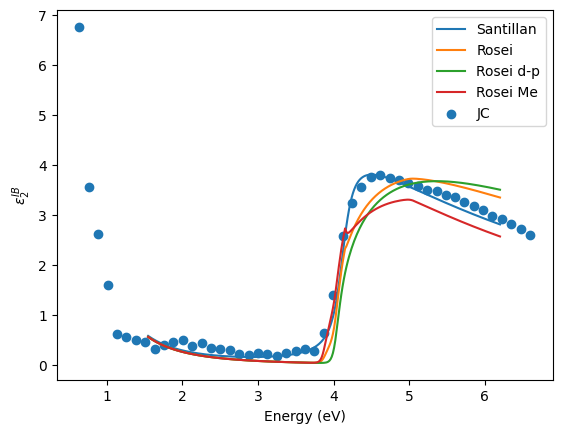

In [10]:
Figure, ax = plt.subplots()
ax.plot(energies, dielImagSantillan, label = 'Santillan')
ax.plot(energies, dielImagRosei, label = 'Rosei')
ax.plot(energies, dielImagRoseiDP, label = 'Rosei d-p')
ax.plot(energies, dielImagRoseiMe, label = 'Rosei Me')
ax.scatter(energiesDataAg, dielImagDataAg, label = 'JC')
ax.set_xlabel('Energy (eV)')
ax.set_ylabel('$\\varepsilon_2^{IB}$')
ax.legend()
plt.show()

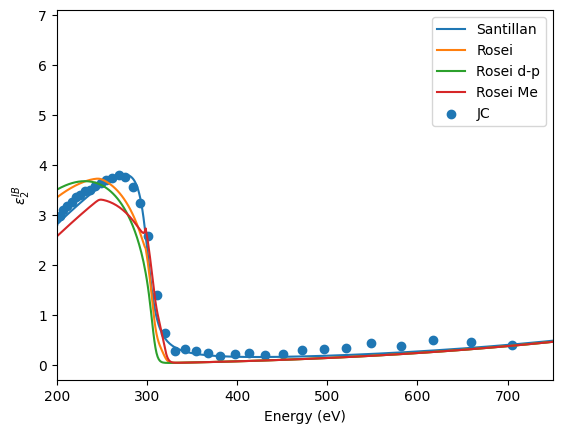

In [11]:
Figure, ax = plt.subplots()
ax.plot(wavelengths, dielImagSantillan, label = 'Santillan')
ax.plot(wavelengths, dielImagRosei, label = 'Rosei')
ax.plot(wavelengths, dielImagRoseiDP, label = 'Rosei d-p')
ax.plot(wavelengths, dielImagRoseiMe, label = 'Rosei Me')
ax.scatter(wavelengthsDataAg, dielImagDataAg, label = 'JC')
ax.set_xlabel('Energy (eV)')
ax.set_ylabel('$\\varepsilon_2^{IB}$')
ax.set_xlim(200,750)
ax.legend()
plt.show()